# Assignment 1: PyTorch Basics

## Overview

In this assignment, you will:
1. Build a simple neural network from scratch to understand how neural networks work.
2. Train a neural network (using PyTorch) to classify images from the Mechanical Tools Classification dataset into one of 8 classes (hammer, wrench, pliers, etc.).

The provided code will guide you through key steps, but by the end of the assignment, you should:

1. Understand the training loop for a machine learning model.
2. Distinguish between training, validation, and test data.
3. Learn about overfitting and underfitting.
4. Explore how hyperparameters, like learning rate and batch size, impact training.
5. Compare a basic feedforward neural network (ANN) with a convolutional neural network (CNN).

This assignment is inspired by materials developed by Prof. Lisa Zhang.


## What to Submit

1. Submit the `.ipynb` and `.html` files containing your code, outputs, and answers from all parts. Please take extra effort to make your answers and submissions readable. Do not display unnecessary outputs, only the ones that are important for supporting your answers.

  You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.


2. Submit your model predictions on the secret test dataset for Parts B-5 and B-6 as `labels_part5.csv` and `labels_part6.csv`.

**Important**: Do not submit additional files generated by your code.

Please use Google Colab for this assignment. If you prefer Jupyter Notebook, ensure the file is uploaded to Colab for submission.


## Colab Link

Include a link to your colab file here and ensure the file can be accessed by the our teaching team.

Colab Link:

In [ ]:
# TO BE COMPLETED
#colab notebook: https://colab.research.google.com/drive/1MDd6WgXx-kYNapLcwYwGIUko0_PilqOH?usp=sharing
#folder: https://drive.google.com/drive/folders/13N_fJpFE0k95B3AG0V_bkUNOBrHcl5bE?usp=sharing

# PART A: Building a Neural Network from Scratch [8pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:


In [99]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Iris_3class.csv to Iris_3class.csv


In [243]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data = raw_data.values
np.random.shuffle(raw_data)

In [244]:
import numpy as np

# split your data into training and validation
X_train = raw_data[0:100,:4]
y_train = raw_data[0:100,4:5].astype(int)
X_val = raw_data[100:,:4]
y_val = raw_data[100:,4:5].astype(int)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 1)
float64 int64
(50, 4) (50, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [245]:
#Convert array to one-hot encoding --> class 0,1,2 to vector [0,1,0]
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [246]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

y_val = to_one_hot(y_val)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 3)
float64 float64
(50, 4) (50, 3)
float64 float64


In [247]:
#verify one-hot encoding
y_train[0:5,:]

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

## Part A-1. Develop a 2-layer ANN [6pt MODEL]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [249]:
# write code to create a 2-layer ANN in vectorized form
import math

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#define softmax
def softmax(x):
  e = np.exp(x)
  return e/e.sum(axis=1, keepdims = True)


def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)

  #Feed forward
  layer0 = X_train #x
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = np.dot(layer1, w1)

  y_pred = softmax(layer2)

  #Back propagation using gradient descent
  #cross entropy
  N = y_train.shape[0]
  max_y = y_train.argmax(axis=1)
  p = y_pred[range(N), max_y]
  error = np.sum(-np.log(p)/ N)

  #initialize gradients to zero
  dw0 = np.zeros((num_features,num_hidden))
  dw1 = np.zeros((num_hidden,num_outputs))


  #calculate gradients
  # # TO BE COMPLETED
  dL_du_hat = y_pred - y_train
  du_dv_hat = w1.T
  dv_hat_dv = np.multiply(layer1, (1 - layer1))
  dv_dw0 = X_train.T
  du_dw1 = layer1.T

  dot_1 = dL_du_hat @ du_dv_hat
  dw0_calc = np.multiply(dv_hat_dv, dot_1)

  #determine gradients
  dw1 += (du_dw1 @ dL_du_hat) / N
  dw0 += (dv_dw0 @ dw0_calc ) / N

  #combine gradients into one vector
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))
  #print("combined gradient:", dW)

  return (error, dW, y_pred)

## Part A-2. Train your neural network [1pt RESULT]
How well does your network work on the iris dataset?

In [250]:
num_hidden = 5
num_features = 4
num_outputs = 3

#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.001
iterations = 100000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)

In [251]:
#examine predictions on training data
(_, _, y_pred) = ann(W, X_train, y_train)
pred = np.round(y_pred, 0)
pred[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [252]:
#examine ground truth training data
train = np.round(y_train, 0)
train[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [254]:
# AWNSER
correct = 0
for i in range(len(pred)):
  if (pred[i] == train[i]).all():
    correct += 1
  else:
      print(f"Incorrect prediction: {pred[i]}, actual label {train[i]}" )
acc = correct/len(pred)

print(f"Accuracy: {acc}")
print(f"My model does very well with {acc *100}% accuracy")
print("There was some trial and error with calculating the gradients and loss function calculations")

Incorrect prediction: [0. 0. 1.], actual label [0. 1. 0.]
Incorrect prediction: [0. 0. 0.], actual label [0. 1. 0.]
Incorrect prediction: [0. 0. 1.], actual label [0. 1. 0.]
Accuracy: 0.97
My model does very well with 97.0% accuracy
There was some trial and error with calculating the gradients and loss function calculations


## Part A-3. Validation [2pt MODEL]
Validate that the gradients were computed correctly for the 2-layer neural network you developed.

In [255]:
#write code to numerical verify the gradients you calculated
num_hidden = 5
num_features = 4
num_outputs = 3

#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))



for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))

  #increment slightly
  We1[ind] = We1[ind] + 0.000001
  We2[ind] =We2[ind] - 0.000001

  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)

  #obtain numerical gradients
  grad_num = (error_e1-error_e2)/0.000002

  diff.append(round(abs(grad_num - dW[ind]), 4))

  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])



0.0 0.20549395718383323 0.20549395740410525
0.0 0.0009353124941213764 0.0009353125761350858
0.0 0.03280738947175621 0.032807389056454146
0.0 0.06035583233199304 0.060355832206553474
0.0 -0.0005750333542664521 -0.0005750335368570152
0.0 0.12531516713210067 0.1253151670521452
0.0 0.000599249538879576 0.0005992494493168083
0.0 0.020349924412244036 0.020349924159431158
0.0 0.028857894074363344 0.02885789397959384
0.0 -0.00482384621136589 -0.00482384661032794
0.0 0.09484878504828487 0.09484878522229315
0.0 0.0003513380697484081 0.0003513380156097128
0.0 0.013489190653359628 0.013489190811278045
0.0 0.041504735426300954 0.041504735145815486
0.0 0.008106089799397864 0.008106089706619458
0.0 0.024374564810969446 0.024374564315786554
0.0 7.527556356023979e-05 7.527569943848036e-05
0.0 0.002991523029294285 0.002991523292055296
0.0 0.012767134460744956 0.012767134591243633
0.0 0.0033696645473924036 0.0033696648249815254
0.0 -0.2569609223179725 -0.2569609219841884
0.0 -0.3005499793484745 -0.300549

# PART B: Training with PyTorch

In the second part of the assignment we will see how we can use PyTorch to train a neural network to identify different Mechanical Tools.


In [139]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

from PIL import Image
import csv

## Part B-0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [140]:
###############################################################################
# Data Loading

def get_data_loader(data_dir, batch_size, valid_split=0.2):
    """
    Load the Mechanical Tools Dataset, split into training, validation, and testing.

    Args:
        data_dir: The root directory of the dataset, with subdirectories for each class.
        batch_size: Number of samples per batch.
        valid_split: Fraction of the training data to be used for validation.

    Returns:
        train_loader: Iterable DataLoader for training data.
        val_loader: Iterable DataLoader for validation data.
        test_loader: Iterable DataLoader for testing data.
        classes: List of class names.
    """
    # Define transformations
    transform = transforms.Compose([
        transforms.Resize((128, 128)),  # Resize to 128x128
        transforms.ToTensor(),         # Convert to Tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
    ])

    # Load the full dataset
    dataset = datasets.ImageFolder(data_dir, transform=transform)
    classes = dataset.classes  # Get class names

    # Split the dataset
    total_size = len(dataset)
    test_size = int(0.1 * total_size)  # 10% for testing
    valid_size = int(valid_split * (total_size - test_size))  # Valid from remaining
    train_size = total_size - test_size - valid_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Normalize labels for multi-class classification.

    Args:
        labels: A 1D tensor of scalar class labels.
    Returns:
        The same labels (already suitable for multi-class classification).
    """
    return labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on a given dataset.

     Args:
         net: PyTorch neural network object.
         loader: PyTorch DataLoader for valuation data.
         criterion: The loss function.

     Returns:
         err: Average classification error rate over the validation set.
         loss: Average loss value over the validation set.
    """
    total_loss = 0.0
    total_err = 0.0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in loader:
            outputs = net(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Compute classification error
            _, predicted = torch.max(outputs, 1)
            total_err += (predicted != labels).sum().item()
            total_loss += loss.item()
            total_samples += len(labels)

    err = total_err / total_samples
    avg_loss = total_loss / len(loader)
    return err, avg_loss

###############################################################################
# Training Curve

def plot_training_curve(path):
    """ Plot training and validation error/loss curves.

    Args:
        path: Base path for the CSV files containing training logs.
    """
    import matplotlib.pyplot as plt

    train_err = np.loadtxt(f"{path}_train_err.csv")
    val_err = np.loadtxt(f"{path}_val_err.csv")
    train_loss = np.loadtxt(f"{path}_train_loss.csv")
    val_loss = np.loadtxt(f"{path}_val_loss.csv")

    plt.figure()
    plt.title("Train vs Validation Error")
    plt.plot(range(1, len(train_err) + 1), train_err, label="Train")
    plt.plot(range(1, len(val_err) + 1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()

    plt.figure()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1, len(train_loss) + 1), train_loss, label="Train")
    plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()


## Part B-1. Visualizing the Data

We will make use of the Mechanical Tools dataset, which consists of
color images of various mechanical tools such as hammers, wrenches,
screwdrivers, and more. These images are resized to 128x128 pixels.
You can find the dataset at https://www.kaggle.com/datasets/salmaneunus/mechanical-tools-dataset

Download the "mechanical_tools.zip" file from Quercus and upload it to your colab session storage.
Run the provided code to automatically unzip the dataset  and split the dataset into
training, validation, and testing sets.

In [143]:
#upload mechanical_tools.zip
from google.colab import files
uploaded = files.upload()

Saving mechanical_tools.zip to mechanical_tools.zip


In [146]:
_ = !unzip "/content/mechanical_tools.zip" -d "/content/mechanical_tools/"


In [154]:
# Load the Mechanical Tools Dataset
data_dir = "/content/mechanical_tools/mechanical_tools"  # Path to the dataset directory
batch_size = 1  # One image per batch for visualization

# Use the get_data_loader function to load the dataset
train_loader, val_loader, test_loader, classes = get_data_loader(
    data_dir=data_dir, batch_size=batch_size)

### Part B-1(i) [0.5pt EXPLORATORY]

Visualize some of the data by running the code below.
Include the visualization in your writeup.

(You don't need to submit anything else.)

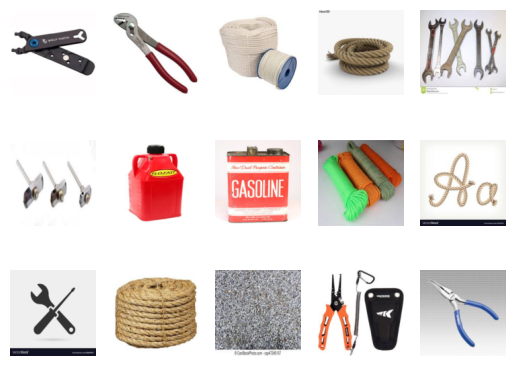

In [155]:
import matplotlib.pyplot as plt

k = 0 #determines the position of the image on the grid
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0] #extracts a single image from images
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break


In [158]:
#ANSWER
for images, labels in train_loader:
    image_size = images[0].shape  # Get the shape of the first image in the batch
    break  # Stop after processing the first batch

#general info
num_train = len(train_loader)
num_val = len(val_loader)
num_test =len(test_loader)
total_instances = num_train + num_val + num_test


print(f"This dataset has a total of {total_instances} images")
print(f"The dataset is colored, which is indicated by the number of channels {image_size[0]} in {image_size}")
print(f"The current batchsize is {train_loader.batch_size}, the image size is {image_size[1]} x {image_size[2]}  ")
print("The majority of the images have a white background, but not all.")
print(f"The dataset is colored, which is indicated by the number of channels {image_size[0]} in {image_size}")

This dataset has a total of 1600 images
The dataset is colored, which is indicated by the number of channels 3 in torch.Size([3, 128, 128])
The current batchsize is 1, the image size is 128 x 128  
The majority of the images have a white background, but not all.
The dataset is colored, which is indicated by the number of channels 3 in torch.Size([3, 128, 128])


### Part B-1(ii) [1pt EXPLORATORY]

How many training examples do we have for the combined classes?
What about validation examples?
What about test examples?

In [258]:
#ANSWSER
print(f"The split for training,validation, testing being {num_train, num_val, num_val} respectively.")
print(f"There are 8 different image labels:")
print(f"{label_to_class}")


The split for training,validation, testing being (1152, 288, 288) respectively.
There are 8 different image labels:
{0: 'Gasoline_Can', 1: 'Hammer', 2: 'Pebbels', 3: 'Rope', 4: 'Screw_Driver', 5: 'Toolbox', 6: 'Wrench', 7: 'pliers'}


## Part B-2. Training

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [161]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 29 * 29, 32)
        self.fc2 = nn.Linear(32, 8)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 29 * 29)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [174]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 31 * 31, 8)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 31 * 31)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [175]:
small_net = SmallNet()
large_net = LargeNet()

### Part B-2(i) [1pt EXPLORATORY]

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values.

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

In [166]:
#tells us the shape of the trainable parameters in small_net
for param in small_net.parameters():
    print(param.shape)

torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([8, 4805])
torch.Size([8])


In [259]:
def count_parameters(net):
    param_count = 0
    for param in net.parameters():
        param_count += param.nelement()
    return param_count

small_param = count_parameters(small_net)
large_param = count_parameters(large_net)
print(f"The number of parameters in small_net is {small_param}")# (((5*3*3*3) + 8) + ((8*4805)+8))
print(f"The number of parameters in large_net is {large_param}")

The number of parameters in small_net is 38588
The number of parameters in large_net is 271056


### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [260]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on an 8-class classification problem
    target_classes = ["Gasoline_Can", "Hammer", "Pebbels", "pliers",
                      "Rope", "Screw_Driver", "Toolbox", "Wrench"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible results
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            data_dir='/content/mechanical_tools/mechanical_tools',  # Ensure this is where your dataset is stored
            batch_size=batch_size)

    # Make sure the classes are as expected
    assert len(classes) == 8, "The dataset should have exactly 8 classes."
    ########################################################################
    # Define the Loss function and optimizer
    # Use CrossEntropyLoss for multi-class classification
    criterion = nn.CrossEntropyLoss()  # Change to CrossEntropyLoss for multi-class
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/accuracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # Loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)  # No need to normalize labels here for CrossEntropyLoss
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
            total_train_err += (predicted != labels).sum().item()  # Count errors
            total_train_loss += loss.item()
            total_epoch += len(labels)

        # Calculate error and loss for the training and validation set
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i + 1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)

        # Print stats for the current epoch
        print(f"Epoch {epoch + 1}: Train err: {train_err[epoch]:.4f}, Train loss: {train_loss[epoch]:.4f} | "
              f"Validation err: {val_err[epoch]:.4f}, Validation loss: {val_loss[epoch]:.4f}")

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Total time elapsed: {elapsed_time:.2f} seconds")

    # Write the train/test loss/error into CSV files for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt(f"{model_path}_train_err.csv", train_err)
    np.savetxt(f"{model_path}_train_loss.csv", train_loss)
    np.savetxt(f"{model_path}_val_err.csv", val_err)
    np.savetxt(f"{model_path}_val_loss.csv", val_loss)


### Part B-2(ii) [0.5pt EXPLORATORY]

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on.

What are the default values of the parameters `batch_size`, `learning_rate`,
and `num_epochs`?

In [261]:
'''
The default values of the parameters are:
batch_size = 64
learning_rate = 0.01
num_epochs = 30
'''

'\nThe default values of the parameters are:\nbatch_size = 64\nlearning_rate = 0.01\nnum_epochs = 30\n'

### Part B-2(iii) [0.5pt EXPLORATORY]
What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

In [172]:

'''
A file is created at the end of every epoch when we call train_net().
The file gets named through the get_model_name function which uses the format:
"model_{0}_bs{1}_lr{2}_epoch{3}".format(name, batch_size,learning_rate,epoch)
where its includes the model name, batch_size, learning_rate, and epoch. At the
end 4 csv files are created with the name of with the last epoch


the 5 files that could be created when we call train_net( small_net, num_epochs=5 ) :
model_small_net_bs64_lr0.01_epoch0
model_small_net_bs64_lr0.01_epoch1
model_small_net_bs64_lr0.01_epoch2
model_small_net_bs64_lr0.01_epoch3
model_small_net_bs64_lr0.01_epoch4

The csv files that would be made are:
model_small_net_bs64_lr0.01_epoch4_train_err.csv
model_small_net_bs64_lr0.01_epoch4_train_loss.csv
model_small_net_bs64_lr0.01_epoch4_val_err.csv
model_small_net_bs64_lr0.01_epoch4_val_loss.csv

which contains the training/val loss/error for each epoch.
'''

'\nA file is created at the end of every epoch when we call train_net().\nThe file gets named through the get_model_name function which uses the format:\n"model_{0}_bs{1}_lr{2}_epoch{3}".format(name, batch_size,learning_rate,epoch)\nwhere its includes the model name, batch_size, learning_rate, and epoch. At the\nend 4 csv files are created with the name of with the last epoch \n\n\nthe 5 files that could be created when we call train_net( small_net, num_epochs=5 ) :\nmodel_small_net_bs64_lr0.01_epoch0\nmodel_small_net_bs64_lr0.01_epoch1\nmodel_small_net_bs64_lr0.01_epoch2\nmodel_small_net_bs64_lr0.01_epoch3\nmodel_small_net_bs64_lr0.01_epoch4\n\nThe csv files that would be made are: \nmodel_small_net_bs64_lr0.01_epoch4_train_err.csv\nmodel_small_net_bs64_lr0.01_epoch4_train_loss.csv\nmodel_small_net_bs64_lr0.01_epoch4_val_err.csv\nmodel_small_net_bs64_lr0.01_epoch4_val_loss.csv\n\nwhich contains the training/val loss/error for each epoch.\n'

### Part B-2(iv) [0.5pt EXPLORATORY]
Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights)
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive
so that the files generated by `train_net` gets saved. We will be using
these files in the parts that follow.
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [10]:
import glob
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [11]:
%cd /content/drive/My Drive/Colab Notebooks/Assignment1/models

/content/drive/My Drive/Colab Notebooks/Assignment1/models


In [ ]:
# SMALL, DEFAULT
small_net = SmallNet()

train_net(small_net)

In [ ]:
# LARGE, DEFAULT
train_net(large_net)

In [262]:
#ANSWER
small_time_default =158.57
large_time_default =   283.45
saved_paths = []

print(f"It took {small_time_default} seconds to train small_net.")
print(f"It took {large_time_default} seconds to train large_net.")
print(f"It makes sense that it took longer to train large_net because it has a larger network with more paramaters.")
print(f"large_net has ~{round(large_param/small_param, 0)}x more parameters than small_net")
print(f"It look {round(large_time_default/small_time_default,1)}x more times to train large_net ")

It took 158.57 seconds to train small_net.
It took 283.45 seconds to train large_net.
It makes sense that it took longer to train large_net because it has a larger network with more paramaters.
large_net has ~7.0x more parameters than small_net
It look 1.8x more times to train large_net 


### Part B-2(v) [0.5pt EXPLORATORY]
Use the function `plot_training_curve` to display the trajectory of the
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

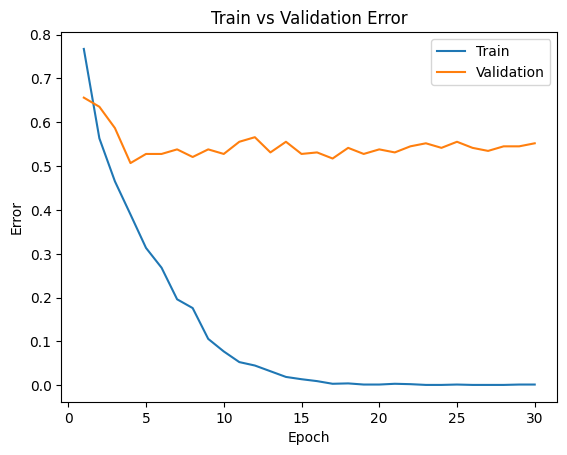

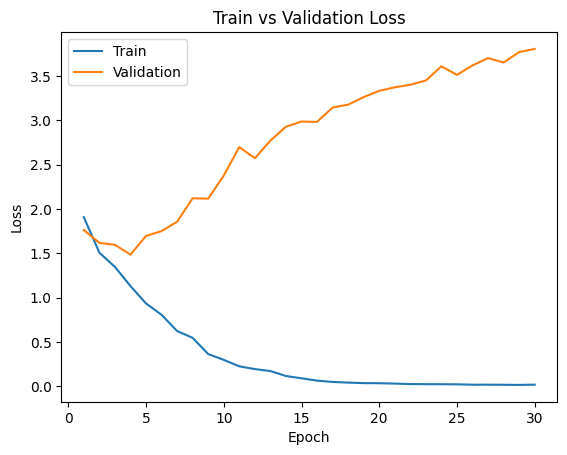

In [178]:
# SMALL PLOT
#makes model name
model_path =  get_model_name("small", batch_size= 64, learning_rate= 0.01, epoch=29)
saved_paths.append(model_path)


#Plot training curve
plot_training_curve(model_path)  # Plot the curve (this assumes the plot is shown inline)


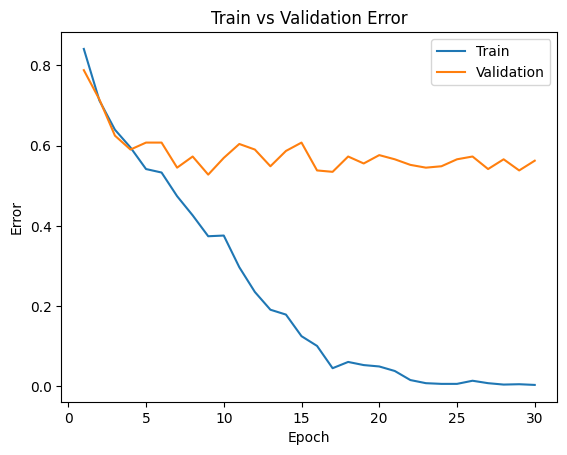

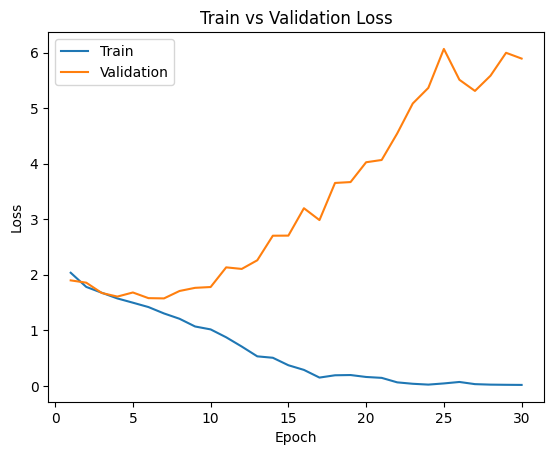

In [179]:
#LARGE PLOT
model_path = get_model_name("large", batch_size= 64, learning_rate= 0.01, epoch=29)
saved_paths.append(model_path)


plot_training_curve(model_path)

In [ ]:
'''
Loss curves represent the model's predictive accuracy.
The error indicates the proportion of incorrect prediction

both models looks to be overfitting
'''


"\nLoss curves represent the model's predictive accuracy.\nThe error indicates the proportion of incorrect prediction\n\nFor the small_network looks to be underfitting and large_net is overfitting\n"

### Part B-2(vi) [0.5pt EXPLORATORY]
Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

In [180]:
'''
The large_net seems to be performing slightly better than small_net

I ran small_net with the default paramters a couple of times throughout doing this homework (had issues with saving models to google drive)
This current small_net model seems to be overfitting the model with the flat, constant, and high validation error/loss
and the decreasing to low training error.


For the large network, it looks like we are overtraining the model. In the error curves
The increase in validation loss while training loss decreasing indicates the model is
it is overfitting.

Overall, models are learning the training data too well and failing to generalize to unseen data

'''

'\nThe large_net seems to be performing slightly better than small_net\n\nI ran small_net with the default paramters a couple of times throughout doing this homework (had issues with saving models to google drive)\nThis current small_net model seems to be overfitting the model with the flat, constant, and high validation error/loss\nand the decreasing to low training error. \n\n\nFor the large network, it looks like we are overtraining the model. In the error curves\nThe increase in validation loss while training loss decreasing indicates the model is\nit is overfitting.\n\nOverall, models are learning the training data too well and failing to generalize to unseen data \n\n'

## Part B-3. Optimization Parameters

For this section, we will work with `large_net` only.

### Part B-3(i) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

In [ ]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.


Epoch 1: Train err: 0.8663, Train loss: 2.0815 | Validation err: 0.8854, Validation loss: 2.0806
Epoch 2: Train err: 0.8646, Train loss: 2.0734 | Validation err: 0.8889, Validation loss: 2.0713
Epoch 3: Train err: 0.8585, Train loss: 2.0622 | Validation err: 0.8854, Validation loss: 2.0555
Epoch 4: Train err: 0.8542, Train loss: 2.0413 | Validation err: 0.8507, Validation loss: 2.0273
Epoch 5: Train err: 0.8351, Train loss: 2.0078 | Validation err: 0.8090, Validation loss: 1.9891
Epoch 6: Train err: 0.7899, Train loss: 1.9661 | Validation err: 0.7882, Validation loss: 1.9590
Epoch 7: Train err: 0.7491, Train loss: 1.9278 | Validation err: 0.7535, Validation loss: 1.9330
Epoch 8: Train err: 0.7370, Train loss: 1.8897 | Validation err: 0.7188, Validation loss: 1.9137
Epoch 9: Train err: 0.6884, Train loss: 1.8414 | Validation err: 0.6944, Validation loss: 1.8703
Epoch 10: Train err: 0.6450, Train loss: 1.7746 | Validation err: 0.6910, Validation loss: 1.7967
Epoch 11: Train err: 0.6189, 

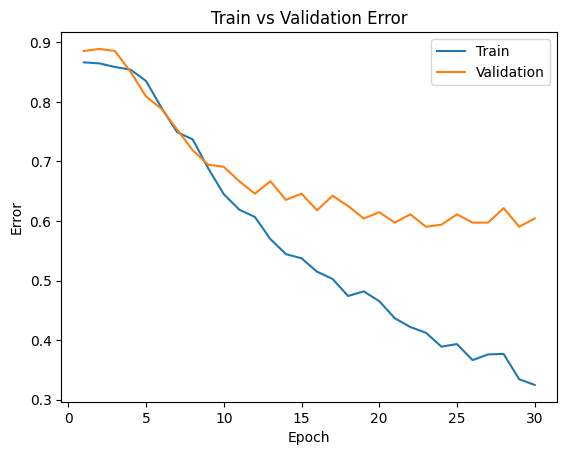

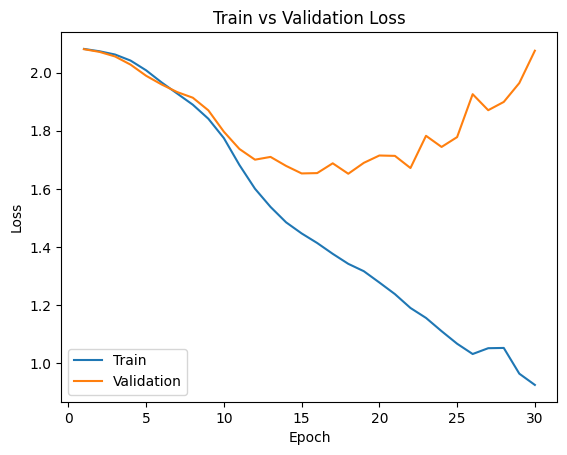

In [ ]:
# LARGE, LR=.001
large_net = LargeNet()

train_net(large_net, learning_rate= 0.001)

#PLOT
model_path = get_model_name("large", batch_size= 64, learning_rate= 0.001, epoch=29)
saved_paths.append(model_path)

plot_training_curve(model_path)

In [181]:
large_time_lr_001 = 259.90
print(f"with the learning rate = 0.01 the training time was {large_time_default}")
print(f"with the learning rate = 0.001 the training time was {large_time_lr_001}")


'''
In this training, we made the learning rate smaller making the change in each change in the weight
smaller when performing gradient descent. Too small of a learning rate and the parameters do not change a lot each iteration
and may take longer.

Increasing the learning rate seems to lessen the gap between teh training and validaiton curves, and effectivley reduce
the some of the overfitting of the model.

The error validation curve went from constant (default) to decreasing more. For loss validation increased signifantly (default), with the smaller
learning rate the validation loss decreases, stablizes and then increases. The increase of the validation loss indicates
that the model is still overfitting.

'''


with the learning rate = 0.01 the training time was 283.45
with the learning rate = 0.001 the training time was 259.9


'\nIn this training, we made the learning rate smaller making the change in each change in the weight\nsmaller when performing gradient descent. Too small of a learning rate and the parameters do not change a lot each iteration\nand may take longer.\n\nIncreasing the learning rate seems to lessen the gap between teh training and validaiton curves, and effectivley reduce\nthe some of the overfitting of the model. \n\nThe error validation curve went from constant (default) to decreasing more. For loss validation increased signifantly (default), with the smaller\nlearning rate the validation loss decreases, stablizes and then increases. The increase of the validation loss indicates\nthat the model is still overfitting.\n\n'

### Part B-3(ii) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.1`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

Epoch 1: Train err: 0.8333, Train loss: 2.0070 | Validation err: 0.8333, Validation loss: 2.0260
Epoch 2: Train err: 0.7778, Train loss: 2.4241 | Validation err: 0.8299, Validation loss: 3.3601
Epoch 3: Train err: 0.8715, Train loss: 2.1709 | Validation err: 0.8715, Validation loss: 2.0927
Epoch 4: Train err: 0.8950, Train loss: 2.0905 | Validation err: 0.8924, Validation loss: 2.0863
Epoch 5: Train err: 0.8776, Train loss: 2.0821 | Validation err: 0.8576, Validation loss: 2.0790
Epoch 6: Train err: 0.8845, Train loss: 2.0828 | Validation err: 0.8681, Validation loss: 2.0826
Epoch 7: Train err: 0.8802, Train loss: 2.0829 | Validation err: 0.8576, Validation loss: 2.0787
Epoch 8: Train err: 0.8733, Train loss: 2.0843 | Validation err: 0.8785, Validation loss: 2.0861
Epoch 9: Train err: 0.8906, Train loss: 2.0846 | Validation err: 0.8715, Validation loss: 2.0777
Epoch 10: Train err: 0.8828, Train loss: 2.0848 | Validation err: 0.8681, Validation loss: 2.0827
Epoch 11: Train err: 0.8785, 

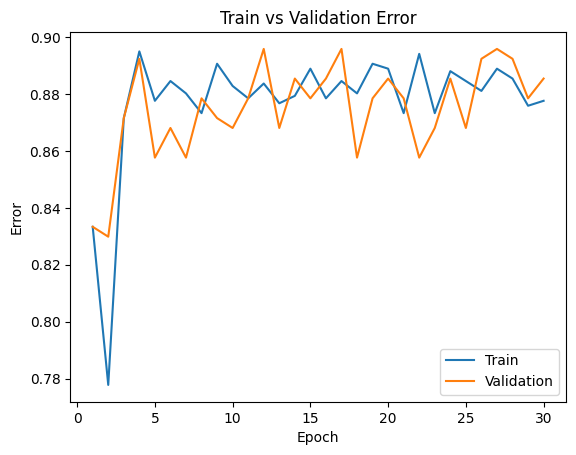

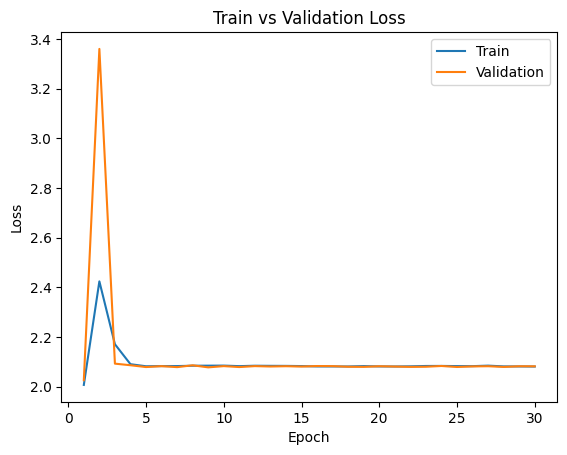

In [ ]:
# LARGE, LR= 0.1

#reset model
large_net = LargeNet()

#train model
train_net(large_net, learning_rate= 0.1)


#plot curve
model_path = get_model_name("large", batch_size= 64, learning_rate= 0.1, epoch=29)
saved_paths.append(model_path)

plot_training_curve(model_path)


In [182]:
#store training time
large_time_lr_1 = 258.44

print(f"with the learning rate = 0.01 the training time was {large_time_default}")
print(f"with the learning rate = 0.001 the training time was {large_time_lr_001}")
print(f"with the learning rate = 0.1 the training time was {large_time_lr_1}")


'''
We made the learning rate larger, meaning that we made larger adjustments to the
weights in response to the gradient of the loss function. When learning rates are too large
it can make the model unstable by overshooting the optimal solution and the learning rate noisy .

With the increase in learning rate, the learning curve has become very noisy and unrepresentive.
'''


with the learning rate = 0.01 the training time was 283.45
with the learning rate = 0.001 the training time was 259.9
with the learning rate = 0.1 the training time was 258.44


'\nWe made the learning rate larger, meaning that we made larger adjustments to the\nweights in response to the gradient of the loss function. When learning rates are too large\nit can make the model unstable by overshooting the optimal solution and the learning rate noisy .\n\nWith the increase in learning rate, the learning curve has become very noisy and unrepresentive.\n'

### Part B-3(iii) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

Epoch 1: Train err: 0.8594, Train loss: 2.0847 | Validation err: 0.8889, Validation loss: 2.0832
Epoch 2: Train err: 0.8655, Train loss: 2.0756 | Validation err: 0.8889, Validation loss: 2.0775
Epoch 3: Train err: 0.8533, Train loss: 2.0697 | Validation err: 0.8507, Validation loss: 2.0703
Epoch 4: Train err: 0.8307, Train loss: 2.0622 | Validation err: 0.8542, Validation loss: 2.0582
Epoch 5: Train err: 0.8273, Train loss: 2.0521 | Validation err: 0.8333, Validation loss: 2.0364
Epoch 6: Train err: 0.8194, Train loss: 2.0163 | Validation err: 0.8090, Validation loss: 2.0029
Epoch 7: Train err: 0.7969, Train loss: 1.9971 | Validation err: 0.7674, Validation loss: 1.9746
Epoch 8: Train err: 0.7682, Train loss: 1.9531 | Validation err: 0.7708, Validation loss: 1.9606
Epoch 9: Train err: 0.7613, Train loss: 1.9372 | Validation err: 0.7535, Validation loss: 1.9476
Epoch 10: Train err: 0.7214, Train loss: 1.8828 | Validation err: 0.7049, Validation loss: 1.9093
Epoch 11: Train err: 0.7040, 

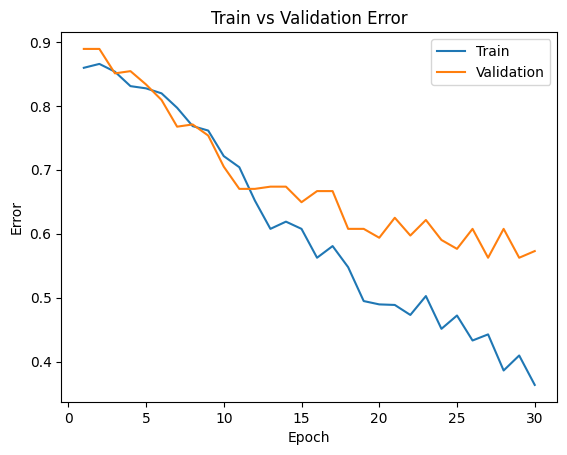

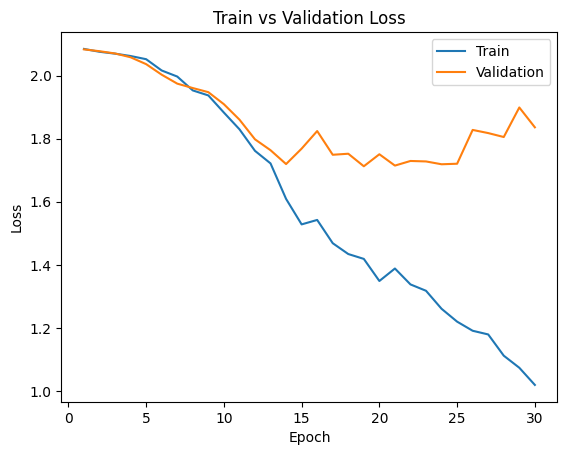

In [ ]:
# LARGE, BATCH_SIZE = 512
#reset model
large_net = LargeNet()

#train model
train_net(large_net, batch_size = 512)


#plot curve
model_path= get_model_name("large", batch_size= 512, learning_rate= 0.01, epoch=29)
saved_paths.append(model_path)

plot_training_curve(model_path)


In [183]:
#store training time
large_time_bs_512 = 371.61

print(f"with the batch size = 64 the training time was {large_time_default}")
print(f"with the batch size = 512 the training time was {large_time_bs_512}")

'''
The increase in batch size improved the performance of the model and seems to have reduced some of the overfitting.
The validation error curve went from high and constant (default) to decreasing (large batch_size).
For the loss function, validation went from increasing (default) to decreasing then constant (large batch_size)
The gap between the training and validation curves is smaller, but still seems to  be overfitting.
'''

with the batch size = 64 the training time was 283.45
with the batch size = 512 the training time was 371.61


'\nThe increase in batch size improved the performance of the model and seems to have reduced some of the overfitting.\nThe validation error curve went from high and constant (default) to decreasing (large batch_size).\nFor the loss function, validation went from increasing (default) to decreasing then constant (large batch_size)\nThe gap between the training and validation curves is smaller, but still seems to  be overfitting.\n'

### Part B-3(iv) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

Epoch 1: Train err: 0.7977, Train loss: 1.9846 | Validation err: 0.7674, Validation loss: 1.8958
Epoch 2: Train err: 0.6589, Train loss: 1.7050 | Validation err: 0.7465, Validation loss: 1.8987
Epoch 3: Train err: 0.6250, Train loss: 1.6688 | Validation err: 0.8056, Validation loss: 1.9328
Epoch 4: Train err: 0.5972, Train loss: 1.5762 | Validation err: 0.7083, Validation loss: 1.8169
Epoch 5: Train err: 0.5347, Train loss: 1.4379 | Validation err: 0.6667, Validation loss: 1.8477
Epoch 6: Train err: 0.4774, Train loss: 1.3486 | Validation err: 0.7014, Validation loss: 1.8605
Epoch 7: Train err: 0.3785, Train loss: 1.0512 | Validation err: 0.6597, Validation loss: 1.9978
Epoch 8: Train err: 0.2405, Train loss: 0.7099 | Validation err: 0.5799, Validation loss: 2.4698
Epoch 9: Train err: 0.1780, Train loss: 0.5332 | Validation err: 0.6840, Validation loss: 3.5427
Epoch 10: Train err: 0.1667, Train loss: 0.5111 | Validation err: 0.6493, Validation loss: 3.7491
Epoch 11: Train err: 0.0938, 

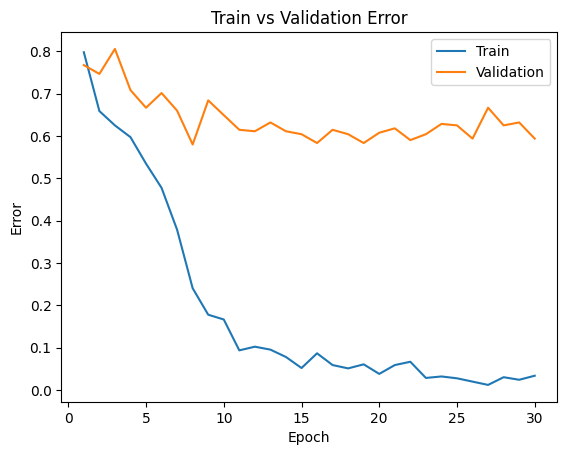

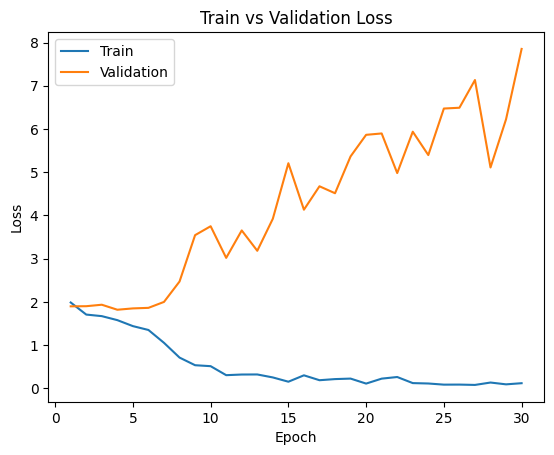

In [ ]:
# LARGE, BATCH_SIZE = 16

#reset model
large_net = LargeNet()

#train model
train_net(large_net, batch_size = 16)


#plot curve
model_path = get_model_name("large", batch_size= 16, learning_rate= 0.01, epoch=29)
saved_paths.append(model_path)

plot_training_curve(model_path)


In [184]:
#store training time
large_time_bs_16 =  271.47

print(f"with the batch size = 64 the training time was {large_time_default}")
print(f"with the batch size = 512 the training time was {large_time_bs_512}")
print(f"with the batch size = 16 the training time was {large_time_bs_16}")

'''
The model performance degrades with the decrease in batch size and follows the same patterns as the default settings
for the large_net. The model is overfitting and not performing well on unseen data. The model seems to be
learning the training data eariler (~ epoch 15) in comparison to epoch 20 (default)
'''


with the batch size = 64 the training time was 283.45
with the batch size = 512 the training time was 371.61
with the batch size = 16 the training time was 271.47


'\nThe model performance degrades with the decrease in batch size and follows the same patterns as the default settings\nfor the large_net. The model is overfitting and not performing well on unseen data. The model seems to be\nlearning the training data eariler (~ epoch 15) in comparison to epoch 20 (default)\n'

## Part B-4. Hyperparameter Search

### Part B-4(i) [1pt EXPLORATORY]

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

In [ ]:
'''
The increased batch_size and a smaller learning rate both seemed to improve the model. I want to try learning rate = .001
and a larger batch_size, around ~200 to understand how the combination will effect the models performance.

'''

'\nThe increased batch_size and a smaller learning rate both seemed to improve the model. I want to try learning rate = .001\nand a larger batch_size, around ~200 to understand how the combination will effect the models performance.\n\n'

### Part B-4(ii) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(i), and include the training curve.

Epoch 1: Train err: 0.8585, Train loss: 2.0840 | Validation err: 0.8889, Validation loss: 2.0885
Epoch 2: Train err: 0.8655, Train loss: 2.0810 | Validation err: 0.8958, Validation loss: 2.0853
Epoch 3: Train err: 0.8637, Train loss: 2.0784 | Validation err: 0.8924, Validation loss: 2.0823
Epoch 4: Train err: 0.8646, Train loss: 2.0760 | Validation err: 0.8924, Validation loss: 2.0796
Epoch 5: Train err: 0.8620, Train loss: 2.0735 | Validation err: 0.8924, Validation loss: 2.0765
Epoch 6: Train err: 0.8620, Train loss: 2.0701 | Validation err: 0.8889, Validation loss: 2.0730
Epoch 7: Train err: 0.8585, Train loss: 2.0664 | Validation err: 0.8889, Validation loss: 2.0690
Epoch 8: Train err: 0.8576, Train loss: 2.0622 | Validation err: 0.8854, Validation loss: 2.0643
Epoch 9: Train err: 0.8576, Train loss: 2.0581 | Validation err: 0.8854, Validation loss: 2.0583
Epoch 10: Train err: 0.8533, Train loss: 2.0509 | Validation err: 0.8889, Validation loss: 2.0514
Epoch 11: Train err: 0.8516, 

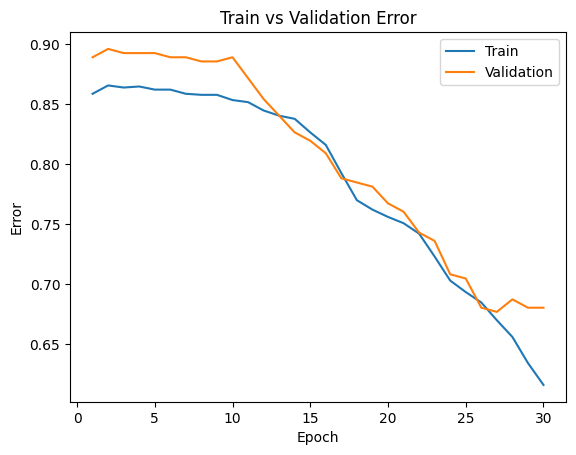

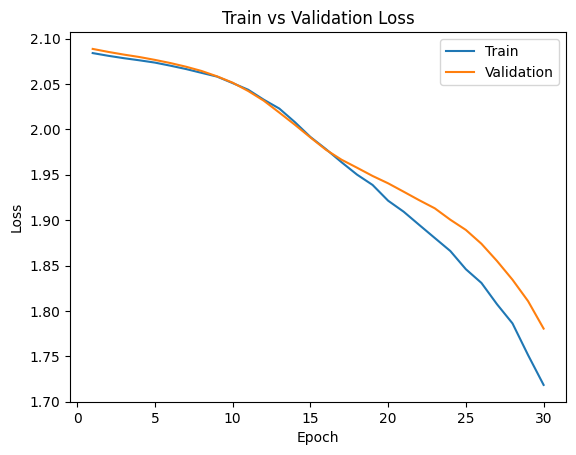

In [ ]:
# LARGE, LR= 0.001, BATCH_SIZE = 200

#reset model
large_net = LargeNet()

#train model
train_net(large_net, learning_rate = 0.001, batch_size = 200)


#plot model
model_path = get_model_name("large", batch_size= 200, learning_rate= 0.001, epoch=29)
saved_paths.append(model_path)

plot_training_curve(model_path)


### Part B-4(iii) [1pt EXPLORATORY]
Based on your result from Part(i), suggest another set of hyperparameter values to try.
Justify your choice.

In [ ]:
large_time_lr_001_bs_200 = 346.91
print(f"with the learning rate = 0.01, batch_size = 64  the training time was {large_time_default}")
print(f"with the learning rate = 0.001, batch_size = 64 the training time was {large_time_lr_001}")
print(f"with the learning rate = 0.001, batch_size = 512 the training time was {large_time_bs_512}")
print(f"with the learning rate = 0.001, batch_size = 200 the training time was {large_time_lr_001_bs_200}")


'''
The combination of lr = 0.001 and batch_size 200, seemed to sigificantly reduce the gap between the training and validation curves.
However, it seems to be underfitting and require more training. I think increasing the epoch could help give the model enough time
to capture the patterns. I will test lr = 0.001, batch_size 200, num_epochs = 50

'''


with the learning rate = 0.01, batch_size = 64  the training time was 283.45
with the learning rate = 0.001, batch_size = 64 the training time was 259.9
with the learning rate = 0.001, batch_size = 512 the training time was 371.61
with the learning rate = 0.001, batch_size = 200 the training time was 346.91


'\nThe combination of lr = 0.001 and batch_size 200, seemed to sigificantly reduce the gap between the training and validation curves.\nHowever, it seems to be underfitting and require more training. I think increasing the epoch could help give the model enough time\nto capture the patterns. I will test lr = 0.001, batch_size 200, num_epochs = 50\n\n'

### Part B-4(iv) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(iii), and include the training curve.

Epoch 1: Train err: 0.8585, Train loss: 2.0840 | Validation err: 0.8889, Validation loss: 2.0885
Epoch 2: Train err: 0.8655, Train loss: 2.0810 | Validation err: 0.8958, Validation loss: 2.0853
Epoch 3: Train err: 0.8637, Train loss: 2.0784 | Validation err: 0.8924, Validation loss: 2.0823
Epoch 4: Train err: 0.8646, Train loss: 2.0760 | Validation err: 0.8924, Validation loss: 2.0796
Epoch 5: Train err: 0.8620, Train loss: 2.0735 | Validation err: 0.8924, Validation loss: 2.0765
Epoch 6: Train err: 0.8620, Train loss: 2.0701 | Validation err: 0.8889, Validation loss: 2.0730
Epoch 7: Train err: 0.8585, Train loss: 2.0664 | Validation err: 0.8889, Validation loss: 2.0690
Epoch 8: Train err: 0.8576, Train loss: 2.0622 | Validation err: 0.8854, Validation loss: 2.0643
Epoch 9: Train err: 0.8576, Train loss: 2.0581 | Validation err: 0.8854, Validation loss: 2.0583
Epoch 10: Train err: 0.8533, Train loss: 2.0509 | Validation err: 0.8889, Validation loss: 2.0514
Epoch 11: Train err: 0.8516, 

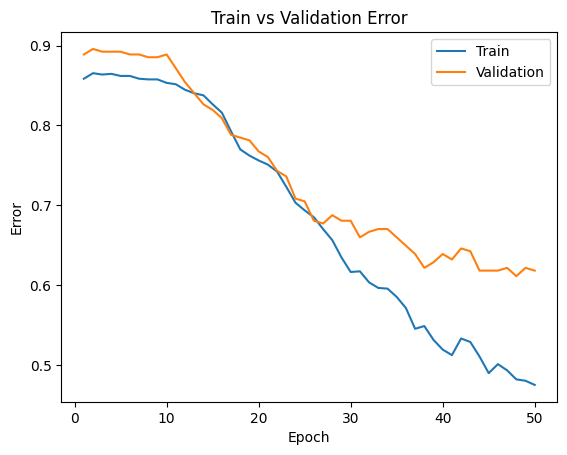

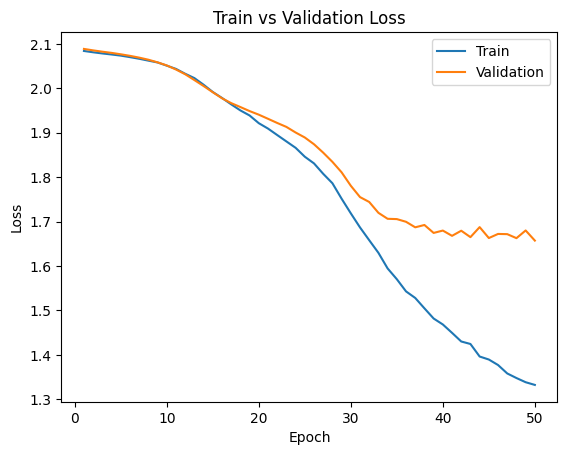

In [ ]:
# TO BE COMPLETED
# LARGE, LR= 0.001, BATCH_SIZE = 200, epoch = 50

#reset model
large_net = LargeNet()

#train model
train_net(large_net, learning_rate = 0.001, batch_size = 200, num_epochs= 50)


#plot model
model_path = get_model_name("large", batch_size= 200, learning_rate= 0.001, epoch=49)
saved_paths.append(model_path)
plot_training_curve(model_path)


## Part B-5. Evaluating the Best Model


### Part B-5(i) [2pt MODEL]

Summarize in a table the results achieved on training and validation on all your model selections. This includes choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`,
**and the epoch number**. Hint: you can import the Pandas module to create tables.


Then upon reviewing the results choose your **best** model and load the model checkpoint. You can modify the code below to load your chosen set of weights to the model object `net`.

'model_small_bs64_lr0.01_epoch29'

In [194]:
results = []
for path in saved_paths:
  # Extract the last epoch's training and validation error/loss
  train_err = pd.read_csv(f"{path}_train_err.csv", header=None).iloc[-1, 0]
  val_err = pd.read_csv(f"{path}_val_err.csv", header=None).iloc[-1, 0]
  train_loss = pd.read_csv(f"{path}_train_loss.csv", header=None).iloc[-1, 0]
  val_loss = pd.read_csv(f"{path}_val_loss.csv", header=None).iloc[-1, 0]
  loss_gap = val_loss - train_loss

  # Parse key to extract model details
  details = path.split("_")
  results.append({
      "Path": path,
      "Model": details[1],  # "large" or "small"
      "Learning Rate": float(details[3][2:]), # Extract learning rate from 'lr0.01'
      "Batch Size": int(details[2][2:]), #Extract batch size from 'bs64'
      "Epochs": int(details[4][5:]),  #Extract epoch from "epoch29"
      "Train Error": train_err,
      "Validation Error": val_err,
      "Train Loss": train_loss,
      "Validation Loss": val_loss,
      "Training/Validation Loss Gap": loss_gap,
      "Validation Accuracy": 1 - val_err
  })


df_results = pd.DataFrame(results).sort_values(by="Validation Loss", ascending= True )

print(df_results)


# Select the best model based on validation error
best_model = df_results.loc[df_results["Validation Loss"].idxmin()]
print("\nBest Model Configuration:")
print(best_model)


                                Path  Model  Learning Rate  Batch Size  \
6  model_large_bs200_lr0.001_epoch49  large          0.001         200   
5  model_large_bs200_lr0.001_epoch29  large          0.001         200   
3   model_large_bs512_lr0.01_epoch29  large          0.010         512   
7  model_large_bs200_lr0.001_epoch99  large          0.001         200   
2   model_large_bs64_lr0.001_epoch29  large          0.001          64   
0     model_large_bs64_lr0.1_epoch29  large          0.100          64   
8    model_small_bs64_lr0.01_epoch29  small          0.010          64   
1    model_large_bs64_lr0.01_epoch29  large          0.010          64   
4    model_large_bs16_lr0.01_epoch29  large          0.010          16   

   Epochs  Train Error  Validation Error  Train Loss  Validation Loss  \
6      49     0.474826          0.618056    1.332277         1.657135   
5      29     0.616319          0.680556    1.718493         1.780521   
3      29     0.363715          0.572917

### Part B-5(ii) [4pt DISCUSSION]

Justify your choice of model from Part (i).

In [195]:
'''
When choosing the best model, I first wanted to look at validation loss. A good model should have a low validation loss.
Model 6 ( 1.657135  ) and model 5 (1.780521) had the lowest validation loss. I will look at those models

The gap between training and validation loss should also be small. However, too small of a gap may indicate overfitting.
model 5 had the lowest gap (0.062028 ), then 6 (0.324858).

I then considered validation error, model 6 had a lower error(.618056 ) than 6 ( 0.680556 )

Considering these factors, I decided that model 6 was the best model as the very low training/validation loss
for model 5 is likely due to overfitting and model 6 had lower validation loss and error.


However, even with this being the "best" model, the model is not performing well and is not learning
to predict the images well and has a pretty low accuracy. Other models had higher validation accuracy but also
higher training/test gap and higher validation loss.


'''


'\nWhen choosing the best model, I first wanted to look at validation loss. A good model should have a low validation loss.\nModel 6 ( 1.657135  ) and model 5 (1.780521) had the lowest validation loss. I will look at those models\n\nThe gap between training and validation loss should also be small. However, too small of a gap may indicate overfitting.\nmodel 5 had the lowest gap (0.062028 ), then 6 (0.324858).\n\nI then considered validation error, model 6 had a lower error(.618056 ) than 6 ( 0.680556 )\n\nConsidering these factors, I decided that model 6 was the best model as the very low training/validation loss\nfor model 5 is likely due to overfitting and model 6 had lower validation loss and error.\n\n\nHowever, even with this being the "best" model, the model is not performing well and is not learning\nto predict the images well and has a pretty low accuracy. Other models had higher validation accuracy but also \nhigher training/test gap and higher validation loss.\n\n\n'

### Part B-5(iii) [2pt RESULT]

Using the helper code in Part 0, any code from lecture notes, or any code that you write, compute and report the **test classification error** for your chosen model.

In [199]:
# If you use the `evaluate` function provided in part 0, you will need to
# set batch_size > 1

# #setting model to be "best model"
net = large_net
model_path = get_model_name(net.name, batch_size= 200, learning_rate=0.001, epoch= 49)
state = torch.load(model_path)
net.load_state_dict(state)


#getting data
train_loader, val_loader, test_loader, classes = get_data_loader(
    data_dir=data_dir,
    batch_size=2)

<ipython-input-199-d1a20bd5449c>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(model_path)


In [200]:
# TO BE COMPLETED
criterion = nn.CrossEntropyLoss()

test_err, test_loss = evaluate(net, test_loader, criterion)
print(f"Average Test Error: {test_err:.4f}, Average Test Loss: {test_loss:.4f}")

Average Test Error: 0.5875, Average Test Loss: 1.6154


### Part B-5(iv) [3pt DISCUSSION]

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

In [201]:
best_val_err = best_model.loc["Validation Error"]
best_test_err = test_err
print(f"Validation Error: {best_val_err:.4f}")
print(f"Test Error: {best_test_err:.4f}")

'''
The test error is lower than the validation error.
You would expect that the test error would be higher than the validation error because the validation error
is used to tune the models paramters during the training process. As a result, the model learns to perform
on that data. Test data has never been seen so it is not unusual for the test error to be higher than
the validation error.
'''

Validation Error: 0.6181
Test Error: 0.5875


'\nThe test error is lower than the validation error.\nYou would expect that the test error would be higher than the validation error because the validation error\nis used to tune the models paramters during the training process. As a result, the model learns to perform\non that data. Test data has never been seen so it is not unusual for the test error to be higher than\nthe validation error.\n'

### Part B-5(v) [3pt DISCUSSION]
Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

In [ ]:
'''
Test data is the final evaluation of our model after all of the paramters are tuned, it provides an unbias evaluation of the model
as it has not been used to train the model or tune the paramters.
Since the validation data was used to train the parameters, it is not an effective way to determine the models performance on unseen data.
We want to use test data as little as possible to avoid "fitting" the model to the test data.

'''

'\nTest data is the final evaluation of our model after all of the paramters are tuned, it provides an unbias evaluation of the model\nas it has not been used to train the model or tune the paramters.\nSince the validation data was used to train the parameters, it is not an effective way to determine the models performance on unseen data.\nWe want to use test data as little as possible to avoid "fitting" the model to the test data.\n\n'

### Part B-5(vi) [3pt RESULT]
Preprocess the images from the secret test set provided below and classify these images into the 8 class labels from the mechanical tools dataset using your chosen model. Report the model predictions by your chosen model on this test dataset as a csv file called 'labels_part5.csv', containing the name of the images and their corresponsing predicted labels for all the images in the folder.

In [ ]:
!pip install wget

In [ ]:
import wget
myfile = wget.download('https://github.com/Sabaae/Dataset/blob/main/secret_test.zip')

In [ ]:
!file "/content/drive/MyDrive/Colab Notebooks/Assignment1/models/secret_test.zip"

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Assignment1/models/secret_test.zip" -d "/content/drive/MyDrive/Colab Notebooks/Assignment1/models/"


In [ ]:
dir = "/content/drive/My Drive/Colab Notebooks/Assignment1/models/secret_test/"
test_listdir = os.listdir(dir)

In [ ]:
#getting image name

# Preprocessing images
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to 128x128
    transforms.ToTensor(),         # Convert to Tensor
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),  # force size to be torch.Size([1, 3, 128, 128])
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

#best model
net = LargeNet()
model_path = get_model_name(net.name, batch_size= 200, learning_rate=0.001, epoch= 49)
state = torch.load(model_path)
net.load_state_dict(state)


name_pred = []
transform_image_shape = []
for file in test_listdir:
  name = file.split(".")[0]
  image_path = os.path.join(dir, file)

  with Image.open(image_path) as img: #open and Tranform image
    trans_img = transform(img)
    trans_img = trans_img.unsqueeze(0) #to get from torch.Size( 3, 128, 128]) to torch.Size([1, 3, 128, 128])
    transform_image_shape.append(trans_img.shape)

    output = net(trans_img)           #model prediciton
    pred = output.max(1, keepdim=True)[1]
    name_pred.append([name, pred])



#csv creation
header = ["Image Name", "Predicted Label"]
with open('labels_part5.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)
    for image_name, label in name_pred:
        writer.writerow([image_name, label.item()])  # Write each element as a separate row


## Part B-6. Fully-Connected Linear ANN vs CNN [4pt RESULT]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.


Similar to what you did in the previous part, report the model predictions by your best ANN architecture on the secret test dataset as a csv file called 'labels_part6.csv', containing the names of the images and their corresopnding predicted labels for all the images in the folder.


How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying mechanical tools images?


In [33]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(128*128*3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 8)

    def forward(self, x):
        x = x.view(-1, 128*128*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [34]:
# TO BE COMPLETED
# Load the Mechanical Tools Dataset
data_dir = "/content/mechanical_tools/mechanical_tools"  # Path to the dataset directory
batch_size = 1  # One image per batch for visualization

# Use the get_data_loader function to load the dataset
train_loader, val_loader, test_loader, classes = get_data_loader(
    data_dir=data_dir, batch_size=batch_size)


In [59]:
ann_paths = []

Epoch 1: Train err: 0.7448, Train loss: 1.9027 | Validation err: 0.7049, Validation loss: 1.8021
Epoch 2: Train err: 0.6458, Train loss: 1.6352 | Validation err: 0.6701, Validation loss: 1.7851
Epoch 3: Train err: 0.6007, Train loss: 1.5286 | Validation err: 0.6458, Validation loss: 1.7643
Epoch 4: Train err: 0.5191, Train loss: 1.3809 | Validation err: 0.6181, Validation loss: 1.6130
Epoch 5: Train err: 0.4983, Train loss: 1.3423 | Validation err: 0.5972, Validation loss: 1.6346
Epoch 6: Train err: 0.4714, Train loss: 1.2298 | Validation err: 0.6007, Validation loss: 1.6573
Epoch 7: Train err: 0.4210, Train loss: 1.2104 | Validation err: 0.6076, Validation loss: 1.6771
Epoch 8: Train err: 0.4071, Train loss: 1.1253 | Validation err: 0.6042, Validation loss: 1.7594
Epoch 9: Train err: 0.3967, Train loss: 1.1385 | Validation err: 0.6146, Validation loss: 1.8097
Epoch 10: Train err: 0.4132, Train loss: 1.1527 | Validation err: 0.6493, Validation loss: 1.9781
Epoch 11: Train err: 0.3733, 

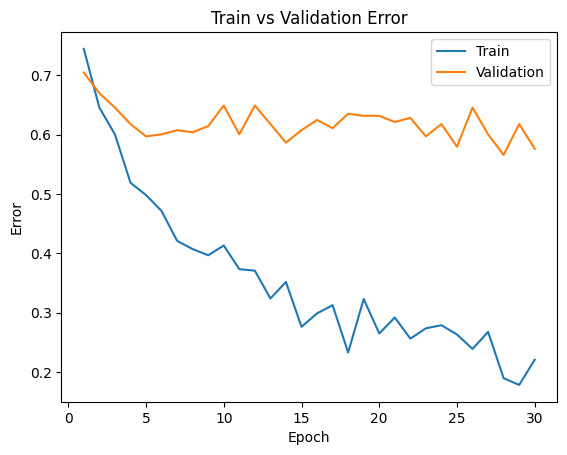

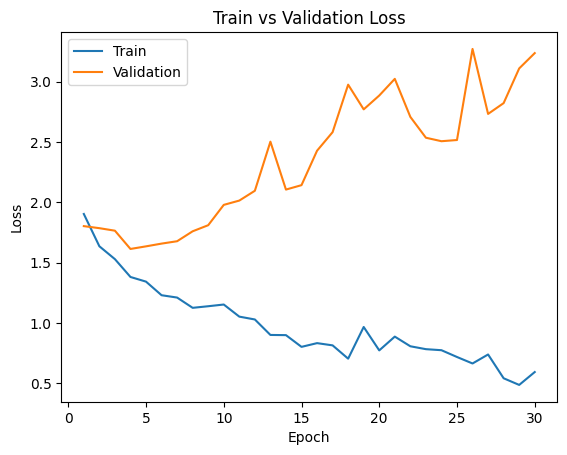

In [35]:

#Default
#reset model
net = simpleANN()
#train model
train_net(net)

#plot model
model_path = get_model_name( net.name, batch_size= 64, learning_rate= 0.01, epoch=29)
ann_paths.append(model_path)
plot_training_curve(model_path)

Epoch 1: Train err: 0.8003, Train loss: 1.9721 | Validation err: 0.6910, Validation loss: 1.8795
Epoch 2: Train err: 0.6554, Train loss: 1.7296 | Validation err: 0.7222, Validation loss: 1.7611
Epoch 3: Train err: 0.6076, Train loss: 1.6042 | Validation err: 0.6667, Validation loss: 1.6700
Epoch 4: Train err: 0.5755, Train loss: 1.5366 | Validation err: 0.6389, Validation loss: 1.6448
Epoch 5: Train err: 0.5582, Train loss: 1.4809 | Validation err: 0.6319, Validation loss: 1.6272
Epoch 6: Train err: 0.4896, Train loss: 1.4094 | Validation err: 0.5764, Validation loss: 1.6041
Epoch 7: Train err: 0.4714, Train loss: 1.3723 | Validation err: 0.6181, Validation loss: 1.6084
Epoch 8: Train err: 0.4679, Train loss: 1.3294 | Validation err: 0.6250, Validation loss: 1.6180
Epoch 9: Train err: 0.4531, Train loss: 1.2928 | Validation err: 0.5903, Validation loss: 1.5977
Epoch 10: Train err: 0.4340, Train loss: 1.2457 | Validation err: 0.5764, Validation loss: 1.5891
Epoch 11: Train err: 0.3950, 

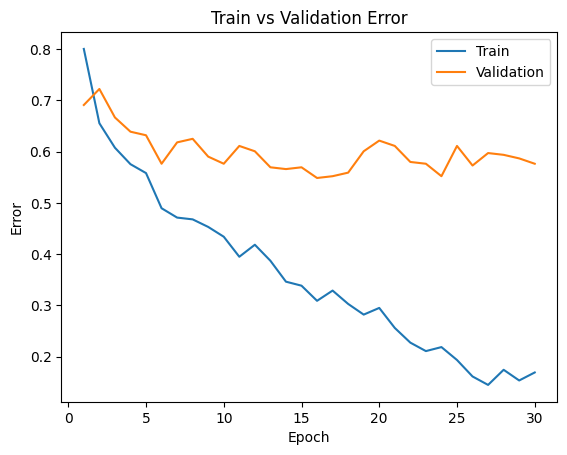

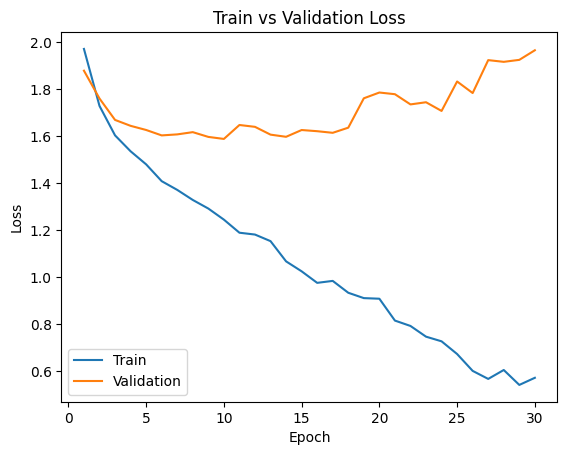

In [37]:
net = simpleANN()
#train model
train_net(net , learning_rate= 0.001)

#plot model
model_path = get_model_name(net.name, batch_size= 64, learning_rate= 0.001, epoch=29)
ann_paths.append(model_path)
plot_training_curve(model_path)

Epoch 1: Train err: 0.8559, Train loss: 2.0303 | Validation err: 0.7326, Validation loss: 1.9495
Epoch 2: Train err: 0.6953, Train loss: 1.8554 | Validation err: 0.7326, Validation loss: 1.8865
Epoch 3: Train err: 0.6580, Train loss: 1.7016 | Validation err: 0.6562, Validation loss: 1.7250
Epoch 4: Train err: 0.6441, Train loss: 1.6420 | Validation err: 0.6701, Validation loss: 1.7032
Epoch 5: Train err: 0.6302, Train loss: 1.5932 | Validation err: 0.6562, Validation loss: 1.7030
Epoch 6: Train err: 0.5981, Train loss: 1.5538 | Validation err: 0.6458, Validation loss: 1.7013
Epoch 7: Train err: 0.5929, Train loss: 1.5846 | Validation err: 0.6181, Validation loss: 1.7221
Epoch 8: Train err: 0.5859, Train loss: 1.5432 | Validation err: 0.6528, Validation loss: 1.6876
Epoch 9: Train err: 0.5608, Train loss: 1.5039 | Validation err: 0.6736, Validation loss: 1.6985
Epoch 10: Train err: 0.5521, Train loss: 1.4247 | Validation err: 0.6285, Validation loss: 1.6530
Epoch 11: Train err: 0.5148, 

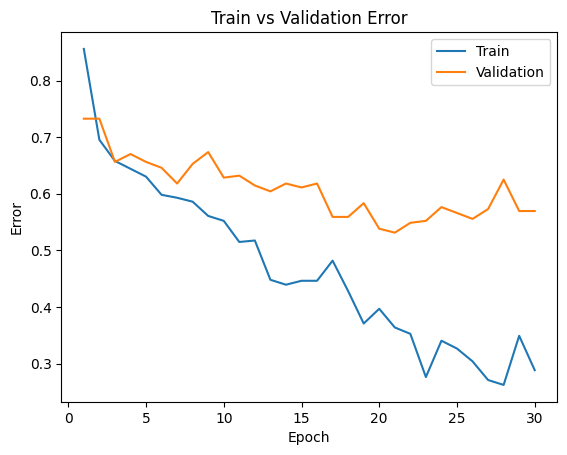

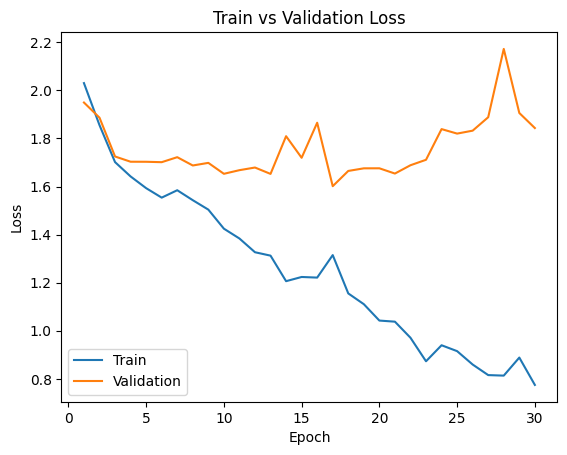

In [39]:
net = simpleANN()
#train model
train_net(net, batch_size= 500)

#plot model
model_path = get_model_name(net.name, batch_size= 500, learning_rate= 0.01, epoch=29)
ann_paths.append(model_path)
plot_training_curve(model_path)

Epoch 1: Train err: 0.7422, Train loss: 1.8904 | Validation err: 0.6771, Validation loss: 1.7883
Epoch 2: Train err: 0.6649, Train loss: 1.6634 | Validation err: 0.7188, Validation loss: 2.0997
Epoch 3: Train err: 0.6259, Train loss: 1.6146 | Validation err: 0.6875, Validation loss: 1.7934
Epoch 4: Train err: 0.6016, Train loss: 1.5608 | Validation err: 0.6562, Validation loss: 1.8451
Epoch 5: Train err: 0.5885, Train loss: 1.5413 | Validation err: 0.7118, Validation loss: 1.8885
Epoch 6: Train err: 0.5816, Train loss: 1.4842 | Validation err: 0.6493, Validation loss: 1.9701
Epoch 7: Train err: 0.5729, Train loss: 1.4259 | Validation err: 0.7118, Validation loss: 1.9459
Epoch 8: Train err: 0.5668, Train loss: 1.4145 | Validation err: 0.6493, Validation loss: 2.0890
Epoch 9: Train err: 0.5365, Train loss: 1.3421 | Validation err: 0.6979, Validation loss: 2.1938
Epoch 10: Train err: 0.5503, Train loss: 1.4409 | Validation err: 0.7014, Validation loss: 3.2002
Epoch 11: Train err: 0.5286, 

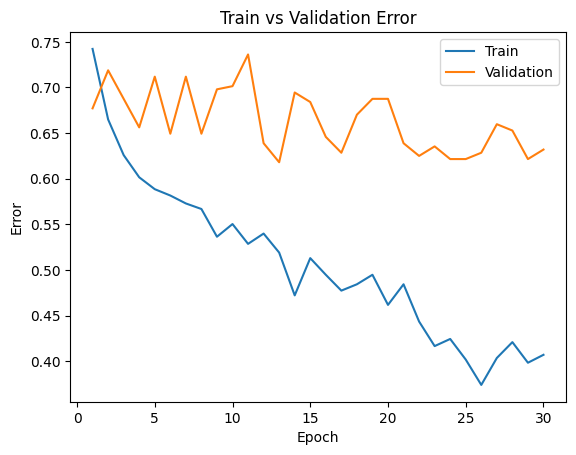

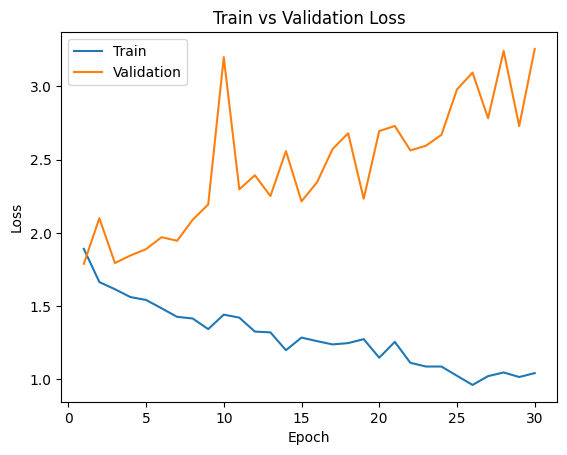

In [40]:
net = simpleANN()
#train model
train_net(net, batch_size= 20)

#plot model
model_path = get_model_name(net.name, batch_size= 20, learning_rate= 0.01, epoch=29)
ann_paths.append(model_path)
plot_training_curve(model_path)

Epoch 1: Train err: 0.7344, Train loss: 1.8542 | Validation err: 0.6458, Validation loss: 1.7394
Epoch 2: Train err: 0.6207, Train loss: 1.6019 | Validation err: 0.6562, Validation loss: 1.6839
Epoch 3: Train err: 0.5773, Train loss: 1.5002 | Validation err: 0.5938, Validation loss: 1.6819
Epoch 4: Train err: 0.5113, Train loss: 1.3784 | Validation err: 0.5764, Validation loss: 1.5828
Epoch 5: Train err: 0.4792, Train loss: 1.3146 | Validation err: 0.5521, Validation loss: 1.5786
Epoch 6: Train err: 0.4366, Train loss: 1.2393 | Validation err: 0.5625, Validation loss: 1.5722
Epoch 7: Train err: 0.4089, Train loss: 1.1567 | Validation err: 0.5833, Validation loss: 1.6934
Epoch 8: Train err: 0.3568, Train loss: 1.0648 | Validation err: 0.5833, Validation loss: 1.6639
Epoch 9: Train err: 0.3438, Train loss: 1.0289 | Validation err: 0.5868, Validation loss: 1.8256
Epoch 10: Train err: 0.3203, Train loss: 0.9484 | Validation err: 0.5556, Validation loss: 1.7174
Epoch 11: Train err: 0.2882, 

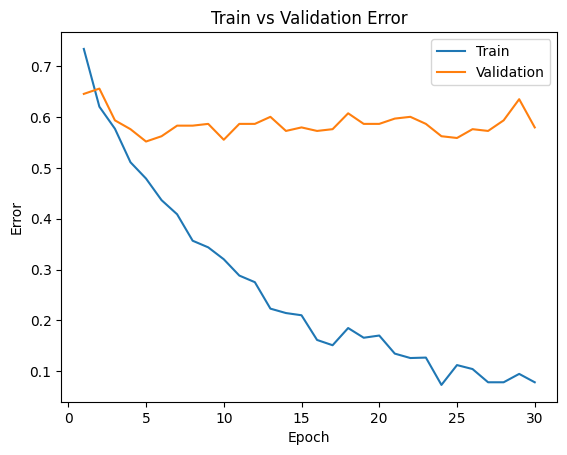

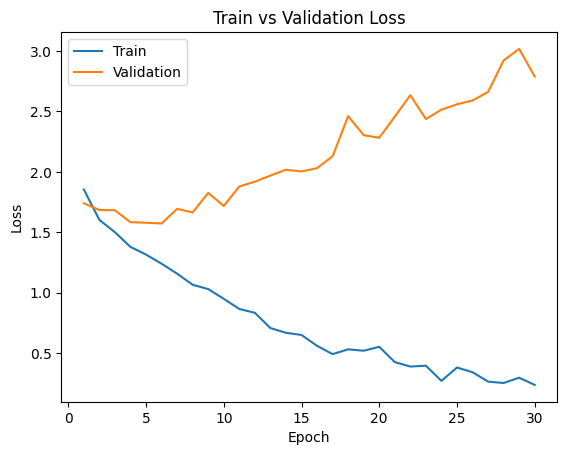

In [41]:
net = simpleANN()
#train model
train_net(net, batch_size= 20, learning_rate= 0.001)

#plot model
model_path = get_model_name(net.name, batch_size= 20, learning_rate= 0.001, epoch=29)
ann_paths.append(model_path)
plot_training_curve(model_path)

Epoch 1: Train err: 0.8646, Train loss: 2.0727 | Validation err: 0.8715, Validation loss: 2.0561
Epoch 2: Train err: 0.8611, Train loss: 2.0364 | Validation err: 0.8576, Validation loss: 2.0277
Epoch 3: Train err: 0.8368, Train loss: 2.0007 | Validation err: 0.8021, Validation loss: 2.0023
Epoch 4: Train err: 0.7804, Train loss: 1.9682 | Validation err: 0.7812, Validation loss: 1.9769
Epoch 5: Train err: 0.7474, Train loss: 1.9367 | Validation err: 0.7674, Validation loss: 1.9514
Epoch 6: Train err: 0.7188, Train loss: 1.9038 | Validation err: 0.7431, Validation loss: 1.9276
Epoch 7: Train err: 0.7031, Train loss: 1.8729 | Validation err: 0.7361, Validation loss: 1.9048
Epoch 8: Train err: 0.6944, Train loss: 1.8446 | Validation err: 0.7326, Validation loss: 1.8852
Epoch 9: Train err: 0.6814, Train loss: 1.8194 | Validation err: 0.7118, Validation loss: 1.8648
Epoch 10: Train err: 0.6502, Train loss: 1.7924 | Validation err: 0.6944, Validation loss: 1.8485
Epoch 11: Train err: 0.6545, 

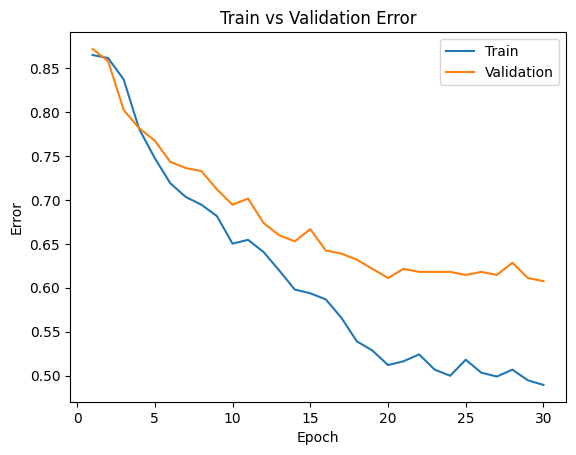

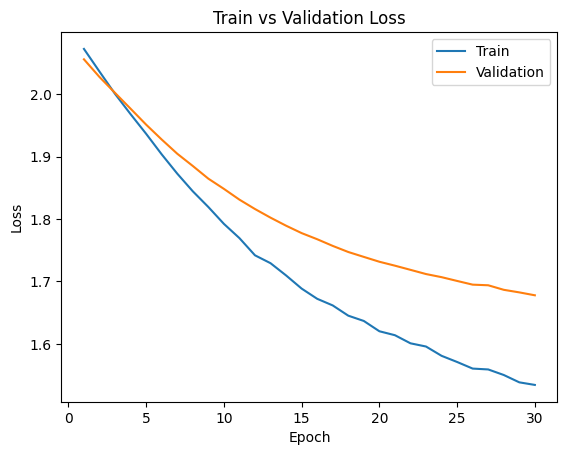

In [234]:
net = simpleANN()
#train model
train_net(net, batch_size= 100, learning_rate= 0.0001)

#plot model
model_path = get_model_name(net.name,batch_size= 100, learning_rate= 0.0001, epoch=29)
ann_paths.append(model_path)
plot_training_curve(model_path)



Epoch 1: Train err: 0.7847, Train loss: 1.9479 | Validation err: 0.7049, Validation loss: 1.8572
Epoch 2: Train err: 0.6424, Train loss: 1.7011 | Validation err: 0.7118, Validation loss: 1.7982
Epoch 3: Train err: 0.6024, Train loss: 1.5990 | Validation err: 0.6424, Validation loss: 1.6729
Epoch 4: Train err: 0.5590, Train loss: 1.5119 | Validation err: 0.6285, Validation loss: 1.6318
Epoch 5: Train err: 0.5425, Train loss: 1.4695 | Validation err: 0.5938, Validation loss: 1.6406
Epoch 6: Train err: 0.5113, Train loss: 1.4117 | Validation err: 0.6007, Validation loss: 1.6146
Epoch 7: Train err: 0.4870, Train loss: 1.3644 | Validation err: 0.5764, Validation loss: 1.6159
Epoch 8: Train err: 0.4497, Train loss: 1.3213 | Validation err: 0.5972, Validation loss: 1.5988
Epoch 9: Train err: 0.4609, Train loss: 1.2947 | Validation err: 0.5625, Validation loss: 1.6243
Epoch 10: Train err: 0.4349, Train loss: 1.2468 | Validation err: 0.5833, Validation loss: 1.5860
Epoch 11: Train err: 0.4141, 

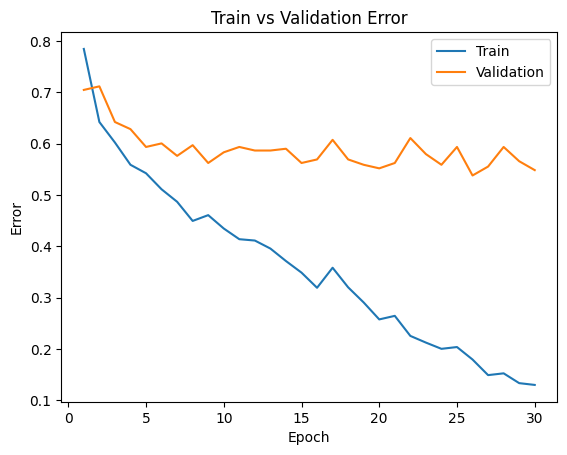

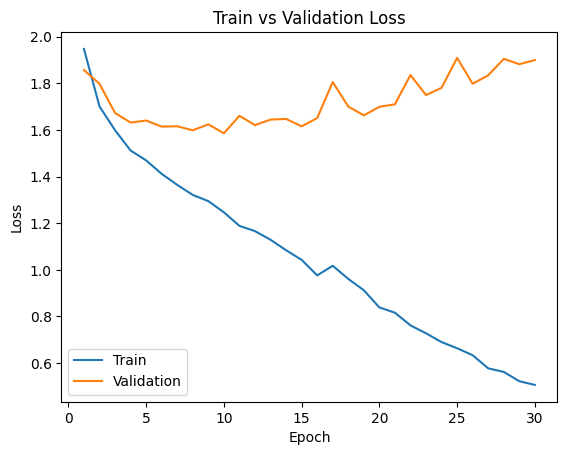

In [43]:
net = simpleANN()
#train model
train_net(net, batch_size= 32, learning_rate = 0.0005)

#plot model
model_path = get_model_name(net.name,batch_size= 32, learning_rate = 0.0005, epoch=29)
ann_paths.append(model_path)
plot_training_curve(model_path)

Epoch 1: Train err: 0.8646, Train loss: 2.0741 | Validation err: 0.8958, Validation loss: 2.0813
Epoch 2: Train err: 0.8655, Train loss: 2.0672 | Validation err: 0.8993, Validation loss: 2.0746
Epoch 3: Train err: 0.8655, Train loss: 2.0602 | Validation err: 0.9097, Validation loss: 2.0684
Epoch 4: Train err: 0.8655, Train loss: 2.0544 | Validation err: 0.9062, Validation loss: 2.0625
Epoch 5: Train err: 0.8698, Train loss: 2.0478 | Validation err: 0.9028, Validation loss: 2.0571
Epoch 6: Train err: 0.8655, Train loss: 2.0421 | Validation err: 0.8993, Validation loss: 2.0520
Epoch 7: Train err: 0.8620, Train loss: 2.0370 | Validation err: 0.8958, Validation loss: 2.0469
Epoch 8: Train err: 0.8646, Train loss: 2.0304 | Validation err: 0.8924, Validation loss: 2.0421
Epoch 9: Train err: 0.8628, Train loss: 2.0238 | Validation err: 0.8924, Validation loss: 2.0374
Epoch 10: Train err: 0.8594, Train loss: 2.0193 | Validation err: 0.8924, Validation loss: 2.0329
Epoch 11: Train err: 0.8559, 

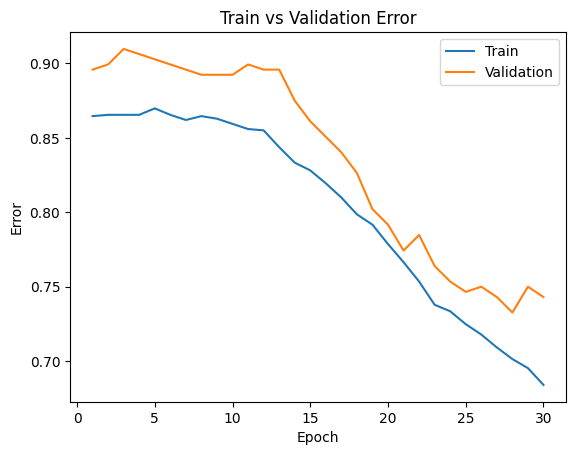

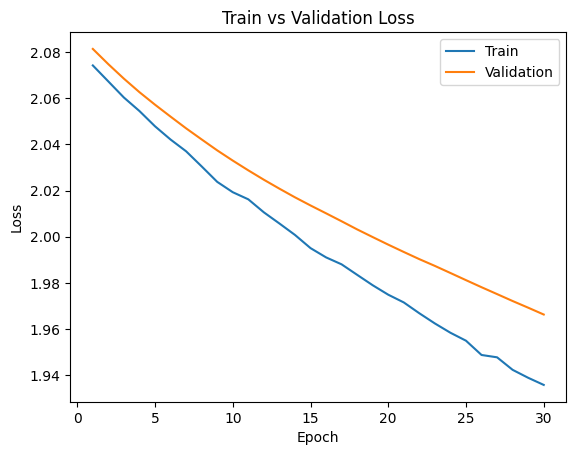

In [44]:
net = simpleANN()
#train model
train_net(net, batch_size= 100, learning_rate= 0.00001)

#plot model
model_path = get_model_name(net.name,batch_size= 100, learning_rate= 0.00001, epoch=29)
ann_paths.append(model_path)
plot_training_curve(model_path)

In [46]:
net = simpleANN()
#train model
train_net(net, batch_size= 100, learning_rate= 0.00001, num_epochs = 50)


Epoch 1: Train err: 0.8906, Train loss: 2.0829 | Validation err: 0.8785, Validation loss: 2.0779
Epoch 2: Train err: 0.8559, Train loss: 2.0762 | Validation err: 0.8646, Validation loss: 2.0712
Epoch 3: Train err: 0.8455, Train loss: 2.0677 | Validation err: 0.8611, Validation loss: 2.0649
Epoch 4: Train err: 0.8420, Train loss: 2.0607 | Validation err: 0.8611, Validation loss: 2.0591
Epoch 5: Train err: 0.8385, Train loss: 2.0536 | Validation err: 0.8507, Validation loss: 2.0537
Epoch 6: Train err: 0.8359, Train loss: 2.0470 | Validation err: 0.8507, Validation loss: 2.0488
Epoch 7: Train err: 0.8316, Train loss: 2.0409 | Validation err: 0.8299, Validation loss: 2.0440
Epoch 8: Train err: 0.8255, Train loss: 2.0349 | Validation err: 0.8229, Validation loss: 2.0397
Epoch 9: Train err: 0.8194, Train loss: 2.0290 | Validation err: 0.8125, Validation loss: 2.0354
Epoch 10: Train err: 0.8116, Train loss: 2.0243 | Validation err: 0.8021, Validation loss: 2.0316
Epoch 11: Train err: 0.8003, 

FileNotFoundError: model_simple_bs100_lr1e-05_epoch50_train_err.csv not found.

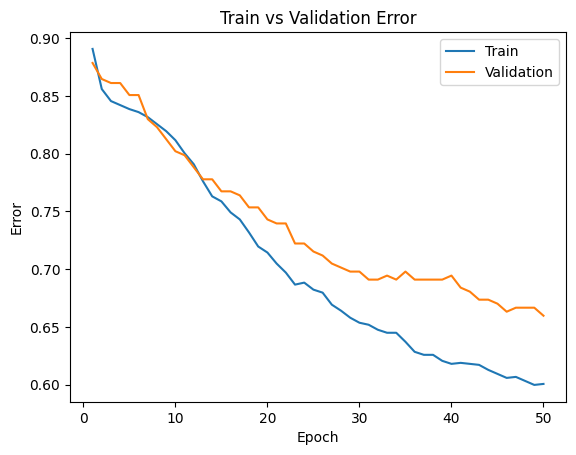

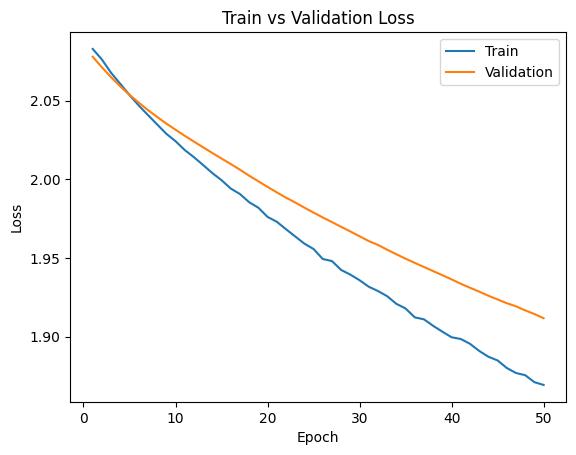

In [69]:
#plot model
model_path = get_model_name(net.name,batch_size= 100, learning_rate= 0.00001, epoch=49)
ann_paths.append(model_path)
plot_training_curve(model_path)

In [76]:
#model comparison and best ANN model

results_ann = []
for path in ann_paths:
  # Extract the last epoch's training and validation error/loss
  train_err = pd.read_csv(f"{path}_train_err.csv", header=None).iloc[-1, 0]
  val_err = pd.read_csv(f"{path}_val_err.csv", header=None).iloc[-1, 0]
  train_loss = pd.read_csv(f"{path}_train_loss.csv", header=None).iloc[-1, 0]
  val_loss = pd.read_csv(f"{path}_val_loss.csv", header=None).iloc[-1, 0]
  loss_gap = val_loss - train_loss

  # Parse key to extract model details
  details = path.split("_")
  results_ann.append({
      "Path": path,
      "Model": details[1],  # "large" or "small"
      "Learning Rate": float(details[3][2:]), # Extract learning rate from 'lr0.01'
      "Batch Size": int(details[2][2:]), #Extract batch size from 'bs64'
      "Epochs": int(details[4][5:]),  #Extract epoch from "epoch29"
      "Train Error": train_err,
      "Validation Error": val_err,
      "Train Loss": train_loss,
      "Validation Loss": val_loss,
      "Training/Validation Loss Gap": loss_gap
  })


df_results_ann = pd.DataFrame(results_ann).sort_values(by="Validation Loss", ascending=True)

print(df_results_ann)


# Select the best model based on validation error
best_model_ann = df_results_ann.loc[df_results_ann["Validation Loss"].idxmin()]
print("\nBest ANN Model Configuration:")
print(best_model_ann)
print("\nBest CNN Model Configuration:")
print(best_model)

                                  Path   Model  Learning Rate  Batch Size  \
5  model_simple_bs100_lr0.0001_epoch29  simple        0.00010         100   
2    model_simple_bs500_lr0.01_epoch29  simple        0.01000         500   
6   model_simple_bs32_lr0.0005_epoch29  simple        0.00050          32   
8   model_simple_bs100_lr1e-05_epoch49  simple        0.00001         100   
7   model_simple_bs100_lr1e-05_epoch29  simple        0.00001         100   
1    model_simple_bs64_lr0.001_epoch29  simple        0.00100          64   
4    model_simple_bs20_lr0.001_epoch29  simple        0.00100          20   
0     model_simple_bs64_lr0.01_epoch29  simple        0.01000          64   
3     model_simple_bs20_lr0.01_epoch29  simple        0.01000          20   

   Epochs  Train Error  Validation Error  Train Loss  Validation Loss  \
5      29     0.486979          0.604167    1.530627         1.672986   
2      29     0.288194          0.569444    0.774669         1.843356   
6      29 

In [235]:
#test classification error - Best ANN
net = simpleANN()
model_path = get_model_name(net.name, batch_size= 100, learning_rate= 0.0001, epoch=29)
state = torch.load(model_path)
net.load_state_dict(state)


#getting data
train_loader, val_loader, test_loader, classes = get_data_loader(
    data_dir=data_dir,
    batch_size = 2)

criterion = nn.CrossEntropyLoss()

test_err, test_loss = evaluate(net, test_loader, criterion)
print(f"Test Error: {test_err:.4f}, Test Loss: {test_loss:.4f}")

ann_test_err = test_err
ann_val_err = best_model_ann.loc["Validation Error"]

<ipython-input-235-3a46e133c49c>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(model_path)


Test Error: 0.5000, Test Loss: 1.5614


In [ ]:
#getting image name
dir = "/content/drive/My Drive/Colab Notebooks/Assignment1/models/secret_test/"
test_listdir = os.listdir(dir)

# Preprocessing images
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to 128x128
    transforms.ToTensor(),         # Convert to Tensor
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),  # force size to be torch.Size([1, 3, 128, 128])
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

#best ANN model
net = simpleANN()
model_path = get_model_name(net.name, batch_size= 100, learning_rate= 0.0001, epoch=29)
state = torch.load(model_path)
net.load_state_dict(state)


name_pred = []
transform_image_shape = []
for file in test_listdir:
  name = file.split(".")[0]
  image_path = os.path.join(dir, file)

  with Image.open(image_path) as img: #open and Tranform image
    trans_img = transform(img)
    trans_img = trans_img.unsqueeze(0) #to get from torch.Size( 3, 128, 128]) to torch.Size([1, 3, 128, 128])
    transform_image_shape.append(trans_img.shape)

    output = net(trans_img)           #model prediciton
    pred = output.max(1, keepdim=True)[1]
    name_pred.append([name, pred])



#csv creation
header = ["Image Name", "Predicted Label"]
with open('labels_part6.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)
    for image_name, label in name_pred:
        writer.writerow([image_name, label.item()])  # Write each element as a separate row

In [263]:
print(f"CNN Model: Validation Error: {best_val_err:.4f}, Validation Loss: 1.657135, Loss Gap: 0.324858, Test Error: {best_test_err:.4f}")
print(f"ANN Model: Validation Error: {ann_val_err:.4f}, Validation Loss: 1.672986, Loss Gap: 0.142359, Test Error: {ann_test_err:.4f}")

'''
On the training and validation set, the best CNN model and best ANN were pretty compariable. With the Ann having a validation
loss of 1.672 and the CNN having a validation loss of 1.657. The loss gap was smaller for the ANN (0.14) than the CNN (0.32).

However, the biggest difference was in the test error, with the ANN model having a lower error of (.49) and therefore a higher prediction accuracy.

'''

CNN Model: Validation Error: 0.6181, Validation Loss: 1.657135, Loss Gap: 0.324858, Test Error: 0.5875
ANN Model: Validation Error: 0.6042, Validation Loss: 1.672986, Loss Gap: 0.142359, Test Error: 0.5000


'\nOn the training and validation set, the best CNN model and best ANN were pretty compariable. With the Ann having a validation \nloss of 1.672 and the CNN having a validation loss of 1.657. The loss gap was smaller for the ANN (0.14) than the CNN (0.32). \n\nHowever, the biggest difference was in the test error, with the ANN model having a lower error of (.49) and therefore a higher prediction accuracy.\n\n'

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to perform a deeper exploration of the assignment.

In part A we constructed and trained a 2-layer neural network from scratch. In Part B we saw how PyTorch can be used to simplify the construction of neural networks by taking care of all the complexity related to gradient calculations, training on GPUs, and structuring your code.

For this bonus challenge we will propose additional task that will have you work towards completing the pipeline and deploying the models online, while exploring ways to improve these models along the way.

Tasks:

1. Modify your code to classify images that are not "Rope" or "Hammer" into the category "other".
2. Preprocess images from the internet to be able to classify any images into mechanical tools lables such as gasoline_can, hammer, etc. (i.e., resize, aspect ratio, etc.). Evaluate your best model's performance on images loaded from the internet.
3. Deploy your best model onto huggingface spaces (or other web hosting services) to classify images into the different mechanical tools classes.

Bonus marks will be provided based on the number of tasks completed and how well they are completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.

In [ ]:
# TO BE COMPLETED






In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [214]:
!ls

 A1.ipynb  'Iris_3class (1).csv'   mechanical_tools	       mechanical_tools.zip
 drive	    Iris_3class.csv	  'mechanical_tools (1).zip'   sample_data


In [217]:
%%shell
jupyter nbconvert --to html A1.ipynb

[NbConvertApp] Converting notebook A1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 36 image(s).
[NbConvertApp] Writing 2348060 bytes to A1.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **5 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**